## Cat vs Dog classification - ANN

## 1. Import required libraries and the dataset 

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

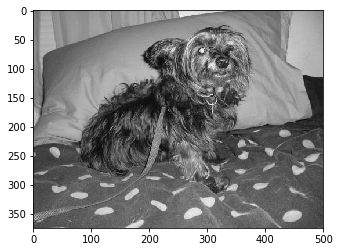

In [4]:
DATADIR = "PetImages"
CATEGORIES = ["Dog", "Cat"]

#one image from the dataset
for category in CATEGORIES:
    path = os.path.join(DATADIR, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array,cmap="gray")
        plt.show()
        break
    break

## 2. Visualise a sample of dataset  

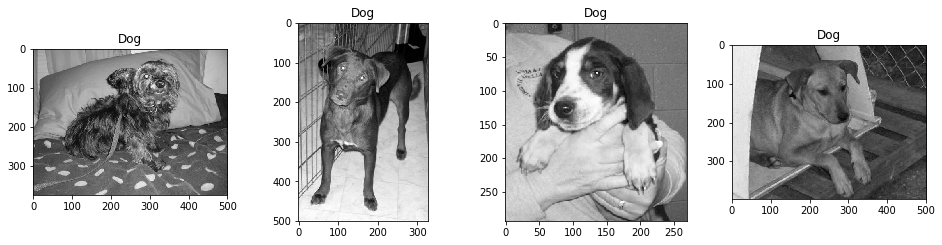

In [5]:
path_dog = os.path.join(DATADIR, CATEGORIES[0])
dog_fnames = os.listdir(path_dog)
plt.figure(figsize=(16, 8))
i=0    
for img in dog_fnames[:4]:
    plt.subplot(2, 4, i+1)
    i=i+1
    img_array = cv2.imread(os.path.join(path_dog,img),cv2.IMREAD_GRAYSCALE)    
    plt.imshow(img_array,cmap="gray")
    plt.title(CATEGORIES[0])
plt.show()  

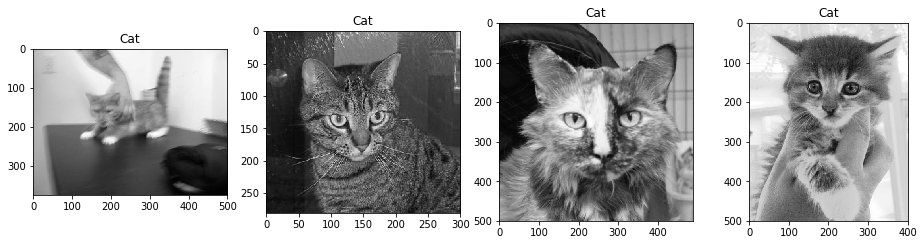

In [6]:
path_cat = os.path.join(DATADIR, CATEGORIES[1])
cat_fnames = os.listdir(path_cat)
plt.figure(figsize=(16, 8))
i=0    
for img in cat_fnames[:4]:
    plt.subplot(2, 4, i+1)
    i=i+1
    img_array = cv2.imread(os.path.join(path_cat,img),cv2.IMREAD_GRAYSCALE)    
    plt.imshow(img_array,cmap="gray")
    plt.title(CATEGORIES[1])
plt.show() 

In [7]:
print("total Dog images: ", len(dog_fnames))
print("total Cat images: ", len(cat_fnames))

total Dog images:  12501
total Cat images:  12501


In [3]:
#the size of the image_array and the values
print(img_array.shape)
print(img_array)

(375, 500)
[[117 117 119 ... 133 132 132]
 [118 117 119 ... 135 134 134]
 [119 118 120 ... 137 136 136]
 ...
 [ 79  74  73 ...  80  76  73]
 [ 78  72  69 ...  72  73  74]
 [ 74  71  70 ...  75  73  71]]


## 3. Data preprocessing 

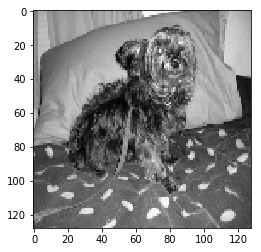

In [4]:
#Defining a concrete size for all the images
IMG_SIZE = 128

new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
plt.imshow(new_array, cmap="gray")
plt.show()

In [5]:
training_data = []

def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
                training_data.append([new_array,class_num])
            except Exception as e:
                pass

create_training_data()

In [6]:
print(len(training_data))

24946


In [7]:
#Randomly shuffling the data,So that cat and dog images are mixed together

import random
random.shuffle(training_data)

In [8]:
#Creating X (input) and y(output) set

X = []
y = []
for features, label in training_data:
    X.append(features)
    y.append(label)
    
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE,1)

## 4. Sequential Model Building with Activation for each layer
## 5. Compile with binary CE loss and metric accuracy 
## 6. Train Model with cross validation, with total time taken shown for 20 epochs 
## 7. Visualise Loss and Accuracy history 
## 8. Show Confusion Matrix for validation dataset 
## All above mentioned blockes covered below :

In [9]:
#importing the packages and modules for the model

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.optimizers import Adam, SGD
from keras.regularizers import l2

Using TensorFlow backend.


In [10]:
#Normalizing the pixel values of the image
X = X/255.0
print(X[1])

#Splitting the Dataset into Test and Train sets
X_test = X[-1000:]
y_test = y[-1000:]

X_train = X[:-1000]
y_train = y[:-1000]

[[[0.01568627]
  [0.01568627]
  [0.02352941]
  ...
  [0.18823529]
  [0.18039216]
  [0.18823529]]

 [[0.01960784]
  [0.01960784]
  [0.02352941]
  ...
  [0.19215686]
  [0.18431373]
  [0.18431373]]

 [[0.02352941]
  [0.02352941]
  [0.02352941]
  ...
  [0.19607843]
  [0.18823529]
  [0.18431373]]

 ...

 [[0.60784314]
  [0.61176471]
  [0.58823529]
  ...
  [0.41960784]
  [0.47058824]
  [0.51372549]]

 [[0.59607843]
  [0.60784314]
  [0.58039216]
  ...
  [0.4745098 ]
  [0.43137255]
  [0.50588235]]

 [[0.58039216]
  [0.60392157]
  [0.55294118]
  ...
  [0.50196078]
  [0.45490196]
  [0.47058824]]]


In [11]:
#Defining the structure and the parameters of the model
classifier_1 = Sequential()

classifier_1.add(Dense(units = 32, activation = 'relu', input_shape = (128,128,1)))
classifier_1.add(Dropout(0.25))
classifier_1.add(Flatten())
classifier_1.add(Dense(units = 1, activation = 'sigmoid'))

In [12]:
#Compile the model
optimizer_1 = Adam(lr = 1e-03)
classifier_1.compile(loss='binary_crossentropy', optimizer=optimizer_1, metrics=['accuracy'])

In [13]:
#Training the model
history1 = classifier_1.fit(X_train, y_train, batch_size = 64, epochs = 20, validation_split = 0.2)

Train on 19156 samples, validate on 4790 samples
Epoch 1/20
19156/19156 [==============================] - 290s 15ms/step - loss: 1.1345 - accuracy: 0.5348 - val_loss: 0.8520 - val_accuracy: 0.5184
Epoch 2/20
19156/19156 [==============================] - 302s 16ms/step - loss: 0.7312 - accuracy: 0.5573 - val_loss: 0.6872 - val_accuracy: 0.5591
Epoch 3/20
19156/19156 [==============================] - 301s 16ms/step - loss: 0.6758 - accuracy: 0.5855 - val_loss: 0.6943 - val_accuracy: 0.5497
Epoch 4/20
19156/19156 [==============================] - 303s 16ms/step - loss: 0.6751 - accuracy: 0.5883 - val_loss: 0.6832 - val_accuracy: 0.5572
Epoch 5/20
19156/19156 [==============================] - 303s 16ms/step - loss: 0.6681 - accuracy: 0.5992 - val_loss: 0.6888 - val_accuracy: 0.5647
Epoch 6/20
19156/19156 [==============================] - 307s 16ms/step - loss: 0.6652 - accuracy: 0.6024 - val_loss: 0.6914 - val_accuracy: 0.5545
Epoch 7/20
19156/19156 [==============================] -

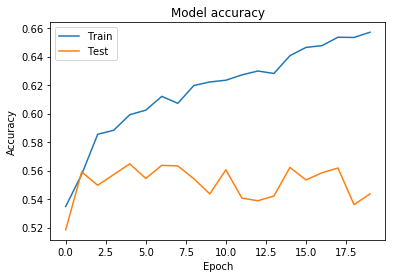

In [14]:
import matplotlib.pyplot as plt
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Test'], loc='upper left')
plt.show()

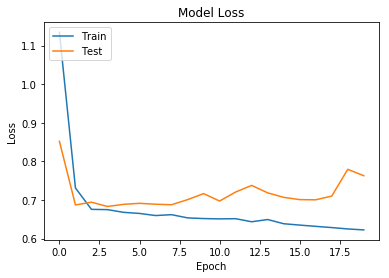

In [15]:
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Test'], loc='upper left')
plt.show()

In [16]:
classifier_1.summary()
classifier_1.evaluate(X_test,y_test)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128, 128, 32)      64        
_________________________________________________________________
dropout_1 (Dropout)          (None, 128, 128, 32)      0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 524288)            0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 524289    
Total params: 524,353
Trainable params: 524,353
Non-trainable params: 0
_________________________________________________________________
1000/1000 [==============================] - 2s 2ms/step


[0.7200470871925354, 0.5870000123977661]

In [17]:
y_pred1 = classifier_1.predict(X_test)
y_pred1 = (y_pred1 > 0.5)

In [18]:
from sklearn.metrics import confusion_matrix
cm1 = confusion_matrix(y_test, y_pred1)
cm1

array([[182, 299],
       [114, 405]], dtype=int64)

In [42]:
classifier_2 = Sequential()

classifier_2.add(Dense(units = 32, activation = 'sigmoid', input_shape = (128,128,1), kernel_regularizer=l2(0.0001)))
classifier_2.add(Flatten())
classifier_2.add(Dropout(0.25))
classifier_2.add(Dense(units = 64, activation = 'sigmoid', kernel_regularizer=l2(0.0001)))
classifier_2.add(Dropout(0.25))
classifier_2.add(Dense(units = 32, activation = 'sigmoid', kernel_regularizer=l2(0.0001)))
classifier_2.add(Dropout(0.25))
classifier_2.add(Dense(units = 1, activation = 'sigmoid'))

In [43]:
optimizer_2 = SGD(lr = 1e-02, momentum = 0.95)
classifier_2.compile(loss='binary_crossentropy', optimizer=optimizer_2, metrics=['accuracy'])

In [44]:
history2 = classifier_2.fit(X_train, y_train, batch_size = 256, epochs = 20, validation_split = 0.2)

Train on 19156 samples, validate on 4790 samples
Epoch 1/20
19156/19156 [==============================] - 527s 28ms/step - loss: 0.7278 - accuracy: 0.4937 - val_loss: 0.7122 - val_accuracy: 0.4983
Epoch 2/20
19156/19156 [==============================] - 533s 28ms/step - loss: 0.7172 - accuracy: 0.4976 - val_loss: 0.7108 - val_accuracy: 0.4983
Epoch 3/20
19156/19156 [==============================] - 533s 28ms/step - loss: 0.7141 - accuracy: 0.4981 - val_loss: 0.7102 - val_accuracy: 0.5017
Epoch 4/20
19156/19156 [==============================] - 529s 28ms/step - loss: 0.7125 - accuracy: 0.4984 - val_loss: 0.7102 - val_accuracy: 0.4983
Epoch 5/20
19156/19156 [==============================] - 532s 28ms/step - loss: 0.7114 - accuracy: 0.5029 - val_loss: 0.7101 - val_accuracy: 0.4983
Epoch 6/20
19156/19156 [==============================] - 532s 28ms/step - loss: 0.7117 - accuracy: 0.4944 - val_loss: 0.7099 - val_accuracy: 0.5017
Epoch 7/20
19156/19156 [==============================] -

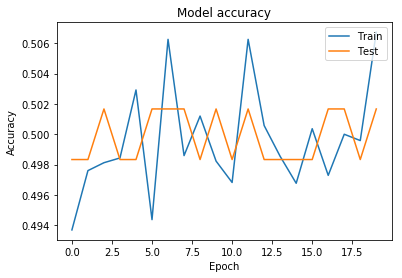

In [45]:
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Test'], loc='upper right')
plt.show()

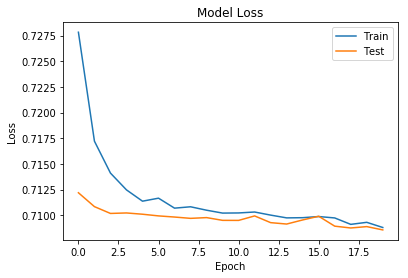

In [46]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Test'], loc='upper right')
plt.show()

In [47]:
classifier_2.summary()
classifier_2.evaluate(X_test,y_test)

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 128, 128, 32)      64        
_________________________________________________________________
flatten_5 (Flatten)          (None, 524288)            0         
_________________________________________________________________
dropout_11 (Dropout)         (None, 524288)            0         
_________________________________________________________________
dense_16 (Dense)             (None, 64)                33554496  
_________________________________________________________________
dropout_12 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_17 (Dense)             (None, 32)                2080      
_________________________________________________________________
dropout_13 (Dropout)         (None, 32)               

[0.7087915840148926, 0.48100000619888306]

In [48]:
y_pred2 = classifier_2.predict(X_test)
y_pred2 = (y_pred2 > 0.5)
cm2 = confusion_matrix(y_test, y_pred2)
cm2

array([[481,   0],
       [519,   0]], dtype=int64)

In [27]:
classifier_3 = Sequential()

classifier_3.add(Dense(units = 32, activation = 'relu', input_shape = (128,128,1), kernel_regularizer=l2(0.0001)))
classifier_3.add(Flatten())
classifier_3.add(Dropout(0.25))
classifier_3.add(Dense(units = 64, activation = 'relu', kernel_regularizer=l2(0.0001)))
classifier_3.add(Dropout(0.25))
classifier_3.add(Dense(units = 32, activation = 'relu', kernel_regularizer=l2(0.0001)))
classifier_3.add(Dropout(0.25))
classifier_3.add(Dense(units = 1, activation = 'sigmoid'))

In [28]:
#optimizer_1 = Adam(lr = 1e-03)
classifier_3.compile(loss='binary_crossentropy', optimizer=optimizer_1, metrics=['accuracy'])

In [29]:
history3 = classifier_3.fit(X_train, y_train, batch_size = 256, epochs = 20, validation_split = 0.2)

Train on 19156 samples, validate on 4790 samples
Epoch 1/20
19156/19156 [==============================] - 543s 28ms/step - loss: 4.4003 - accuracy: 0.4997 - val_loss: 1.4630 - val_accuracy: 0.4983
Epoch 2/20
19156/19156 [==============================] - 549s 29ms/step - loss: 1.3220 - accuracy: 0.4982 - val_loss: 1.2175 - val_accuracy: 0.5069
Epoch 3/20
19156/19156 [==============================] - 551s 29ms/step - loss: 1.1564 - accuracy: 0.5080 - val_loss: 1.0998 - val_accuracy: 0.5021
Epoch 4/20
19156/19156 [==============================] - 548s 29ms/step - loss: 1.0574 - accuracy: 0.5199 - val_loss: 1.0211 - val_accuracy: 0.5040
Epoch 5/20
19156/19156 [==============================] - 545s 28ms/step - loss: 0.9880 - accuracy: 0.5122 - val_loss: 0.9539 - val_accuracy: 0.5466
Epoch 6/20
19156/19156 [==============================] - 546s 29ms/step - loss: 0.9318 - accuracy: 0.5479 - val_loss: 0.9057 - val_accuracy: 0.5603
Epoch 7/20
19156/19156 [==============================] -

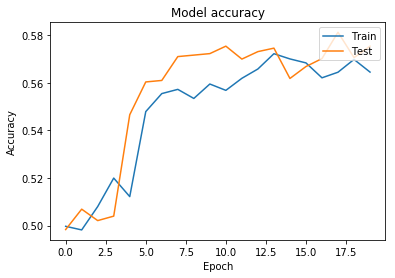

In [30]:
plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Test'], loc='upper right')
plt.show()

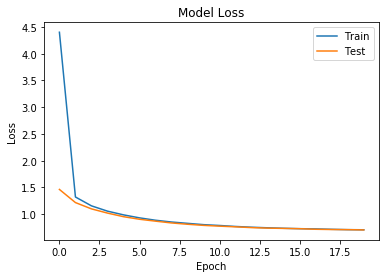

In [31]:
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Test'], loc='upper right')
plt.show()

In [32]:
classifier_3.summary()
classifier_3.evaluate(X_test,y_test)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 128, 128, 32)      64        
_________________________________________________________________
flatten_3 (Flatten)          (None, 524288)            0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 524288)            0         
_________________________________________________________________
dense_8 (Dense)              (None, 64)                33554496  
_________________________________________________________________
dropout_6 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 32)                2080      
_________________________________________________________________
dropout_7 (Dropout)          (None, 32)               

[0.7032380084991455, 0.5789999961853027]

In [33]:
y_pred3 = classifier_3.predict(X_test)
y_pred3 = (y_pred3 > 0.5)
cm3 = confusion_matrix(y_test, y_pred3)
cm3

array([[362, 119],
       [302, 217]], dtype=int64)

In [34]:
classifier_4 = Sequential()

classifier_4.add(Dense(units = 32, activation = 'relu', input_shape = (128,128,1), kernel_regularizer=l2(0.0001)))
classifier_4.add(Flatten())
classifier_4.add(Dropout(0.25))
classifier_4.add(Dense(units = 64, activation = 'relu', kernel_regularizer=l2(0.0001)))
classifier_4.add(Dropout(0.25))
classifier_4.add(Dense(units = 32, activation = 'relu', kernel_regularizer=l2(0.0001)))
classifier_4.add(Dropout(0.25))
classifier_4.add(Dense(units = 1, activation = 'sigmoid'))

In [36]:
optimizer_2 = SGD(lr = 1e-02, momentum = 0.95)
classifier_4.compile(loss='binary_crossentropy', optimizer=optimizer_2, metrics=['accuracy'])

In [37]:
history4 = classifier_4.fit(X_train, y_train, batch_size = 256, epochs = 20, validation_split = 0.2)

Train on 19156 samples, validate on 4790 samples
Epoch 1/20
19156/19156 [==============================] - 533s 28ms/step - loss: 0.7107 - accuracy: 0.5232 - val_loss: 0.6994 - val_accuracy: 0.5831
Epoch 2/20
19156/19156 [==============================] - 524s 27ms/step - loss: 0.6985 - accuracy: 0.5684 - val_loss: 0.6914 - val_accuracy: 0.5908
Epoch 3/20
19156/19156 [==============================] - 524s 27ms/step - loss: 0.6911 - accuracy: 0.5853 - val_loss: 0.6823 - val_accuracy: 0.6044
Epoch 4/20
19156/19156 [==============================] - 525s 27ms/step - loss: 0.6860 - accuracy: 0.5926 - val_loss: 0.6786 - val_accuracy: 0.6084
Epoch 5/20
19156/19156 [==============================] - 525s 27ms/step - loss: 0.6795 - accuracy: 0.5997 - val_loss: 0.6782 - val_accuracy: 0.6086
Epoch 6/20
19156/19156 [==============================] - 524s 27ms/step - loss: 0.6778 - accuracy: 0.6051 - val_loss: 0.6739 - val_accuracy: 0.6184
Epoch 7/20
19156/19156 [==============================] -

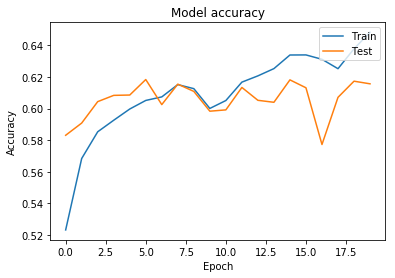

In [38]:
plt.plot(history4.history['accuracy'])
plt.plot(history4.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Test'], loc='upper right')
plt.show()

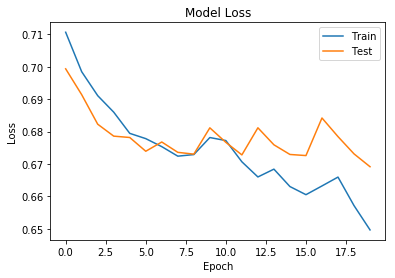

In [39]:
plt.plot(history4.history['loss'])
plt.plot(history4.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Test'], loc='upper right')
plt.show()

In [40]:
classifier_4.summary()
classifier_4.evaluate(X_test,y_test)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 128, 128, 32)      64        
_________________________________________________________________
flatten_4 (Flatten)          (None, 524288)            0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 524288)            0         
_________________________________________________________________
dense_12 (Dense)             (None, 64)                33554496  
_________________________________________________________________
dropout_9 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_13 (Dense)             (None, 32)                2080      
_________________________________________________________________
dropout_10 (Dropout)         (None, 32)               

[0.6589216833114624, 0.640999972820282]

In [41]:
y_pred4 = classifier_4.predict(X_test)
y_pred4 = (y_pred4 > 0.5)
cm4 = confusion_matrix(y_test, y_pred4)
cm4

array([[333, 148],
       [211, 308]], dtype=int64)

## Summary:
   <b> 
    Model with the less loss and higher accuracy is desired ideally. <br>
    Classifier_1 :- which is compiled using all 1s' from problem statment performed better than Classifier_2. <br>
    Classifier_2 :- which is compiled using all 2s' from problem statement is the model with lowest accuracy. <br>
    </b>
### Additionally following two classifiers are implemented with the combination of parameters keeping the same batch size & hidden layers and related activiation functions.
   <b><br>
   Classifier_3 :- uses Adam as optimizer worked well on the training set as compared to validation set. <br>
   Classifier_4 :- uses SGD as optimizer produced similar accuracy results on both the data sets. <br>
   </b>
    